# Full implemetation of KNN in Python

#### Instructions

Complete this notebook and submit it as the solution for question 2 in home assignment no. 1 

* In the relevant cell below, fill in the two id numbers for the students submitting this notebook
* Cells with 'COMPLETED - NO CHANGES ARE REQUIRED' in their description require no edits and should be left unchanged
* Cells with 'TO BE COMPLETED' require you to complete the code according to the given description 
* **NOTE**: After you complete the notebook and run all cells, **discuss** the results displayed in the graph produced at the end of the notebook 

In [246]:
# replace the strings below with the personal details of the two students submitting this notebook
Name1 = 'Matan Porat' # student 1 name and surname in the format 'Arik Paran'
Name2 = 'Rotem Tsalisher' # student 2 name and surname in the format 'Arik Paran' 
id1 = '318734944' # student 1 id
id2 = '203773601' # student 2 id

In [247]:
import numpy as np

def LoadIrisData(fname):
    '''
    ***COMPLETED - NO CHANGES ARE REQUIRED***
    
    Usage: load data from file in the path 'fname'
    
    Input: the path for the file that stores the data
    Output: feature matrix X, and labels vector Y
    '''
    
    # read the features data from the csv file
    X = np.loadtxt(fname,dtype=float, delimiter=',', skiprows = 1,usecols=[1,2,3,4])

    # read the labels data from the csv file
    Y = np.loadtxt(fname,dtype=str, delimiter=',', skiprows = 1,usecols=[5])
    
    return X, Y

In [248]:
from numpy.random import randint
def SplitTrainTest(X,Y):
    '''
    ***COMPLETED - NO CHANGES ARE REQUIRED***
    
    Input: feature matrix X, labels vector Y
    Output: X_train, Y_train - train data
            X_test, Y_test - test data
    '''
    
    # permute the ordering of the examples
    ind = np.random.RandomState(seed=int(id1)+int(id2)).permutation(len(Y))

    # randomly choose the size of the training data
    Ntrain = np.random.RandomState(seed=int(id1)+int(id2)).randint(0.6*len(Y),0.8*len(Y))

    # split the data into train and test datasets
    X_train = X[ind[:Ntrain]]
    Y_train = Y[ind[:Ntrain]]
    X_test  = X[ind[Ntrain:]]
    Y_test  = Y[ind[Ntrain:]]

    return X_train, Y_train, X_test, Y_test

In [249]:
def findAxisVal(x):
    condition = len(x.shape)
    if(condition == 1):
        axis_ = 0
    else:
        axis_ = 1
    return axis_




def PairwiseDistance(a,b):
    '''
    ***TO BE COMPLETED***
    
    Usage: compute the euclidean distance between pair of examples
    
    Input: two numerical vectors of eqaul length
    Output: the euclidean distance between the vectors
    
    Example: 
    PairwiseDistance([3, 1],[6, 5]) returns 5
    [calculation: sqrt((3-6)^2+(1-5)^2) = sqrt(9+16) = 5]
    '''
    axis_=max(findAxisVal(a),findAxisVal(b))
    return np.linalg.norm(a-b,axis = axis_)

In [250]:
def SortArray(a):
    '''
    ***TO BE COMPLETED***
    
    Usage: return the ordering of the elements of the input array such that their values are ascending
    
    Input: a vector with numerical values
    Output: the indices of the input array, such that the array is sorted in ascending order
    
    Example: 
    SortArray([1.34, 2.18, 1.21]) returns [2,0,1]
    '''
    return np.argsort(a)

In [251]:
def MajorityVote(inds,y,K):
    '''
    ***TO BE COMPLETED***
    
    Usage: find the most frequent label in y's K leading values, after it sorted acording to inds
    
    Input: inds - an ordering of y
           y    - a vector of labels
           K    - an integer
    Output: most frequent label
    
    Example 1: 
    SortArray(inds = [2, 0, 1, 3, 5, 4], 
              y    = ['setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor']) 
              K    = 1)
    returns 'versicolor'

    Example 2: 
    SortArray(inds = [2, 0, 1, 3, 5, 4], 
              y    = ['setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor']) 
              K    = 3)
    returns 'setosa'
    '''
    
    # the labels of the K nearest neighbors
    arr = y[inds[:K]]
    # counting the number occurences of each label amongst the K nearest neighbors
    unique, counts = np.unique(arr, return_counts=True)
    index = np.argmax(counts)
 
    
    # the most frequent label amongst the K nearest neighbors
    return unique[index]

In [252]:
def KNearestNeighborsClassifier(X_train, Y_train , X_test, K):
    '''
    ***TO BE COMPLETED***
    
    Usage: estimate the label of each unclassified example in X_test to be the most 
           frequent label amongst its K nearest neighbors in X_train
           
    Input:  X_train - training data (features)
            Y_train - training data (labels)  
            X_test  - test data (features)    
            K       - number of neighbors
    
    
    
    Output: Y_test  - the classifier's labels for the test data
    
    '''
    Y_pred = []
     
    # loop through the examples to be classified
    for sample in X_test:
 # compute the pairwise distances between the each unclassified example and 
 # all classified example

        dstVec = PairwiseDistance(X_train,sample) # get the vector of sample's distances from training x vector
        inds = SortArray(dstVec) # find the unclassified example's K nearest neighbors
        _Y = MajorityVote(inds,Y_train,K) # classify via most frequenct label
        Y_pred.append(_Y) # append classified info to classified info's vector
    return Y_pred

In [253]:
import matplotlib.pyplot as plt

def PlotAccuracy(accuracy):

    '''
    ***COMPLETED - NO CHANGES ARE REQUIRED***
    '''
    plt.figure(figsize=(14,5))
    plt.plot(accuracy,'.-')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN estimated accuracy for various values of K');
    return

In [254]:
def Accuracy(Y_pred, Y_test):
    '''
    ***TO BE COMPLETED***
    
    Usage: calculate the classifier accuracy 
    
    Input: Y_test - true labels of X_test
           Y_pred - estimated labels of X_test
    Output: accuracy - the nember of correctly classified examples, divided by the total number of examples    

    Example: 
    calling Accuracy(Y_pred = ['setosa', 'setosa', 'versicolor', 'setosa', 'virginica']), 
                     Y_test = ['setosa', 'setosa', 'versicolor', 'versicolor', 'virginica']))
    returns 0.8
    '''
    
    # calculate the accuracy - the ratio between the number of examples in X_test for which
    # the true label and the estimated label are the same, and the total number 
    # of examples in X_test
    
    return ((np.sum(Y_pred==Y_test))/len(Y_test))

In [255]:
def main(fname, Kmax):
    '''
    ***COMPLETED - NO CHANGES ARE REQUIRED***
    '''    
    # STEP 1: load data
    X,Y = LoadIrisData(fname)
    
    # STEP 2: split the data into train/test datasets
    X_train, Y_train, X_test, Y_test = SplitTrainTest(X,Y)
    print('Data is split into ' + str(X_train.shape[0]) + ' examples for training and ' + str(X_test.shape[0]) + ' examples for testing')
    # an array to store all computed accuracies
    accuracy = np.zeros(Kmax)
    
    # repeat for all considered values of K
    for K in range(Kmax):

        # STEP 3: classify the test data using a KNN classifier
        Y_pred = KNearestNeighborsClassifier(X_train, Y_train, X_test , K+1)

        # STEP 4: calculate the KNN classifier accuracy
        accuracy[K] = Accuracy(Y_pred, Y_test)
        
    # plot results
    PlotAccuracy(accuracy)
    return

Data is split into 92 examples for training and 58 examples for testing


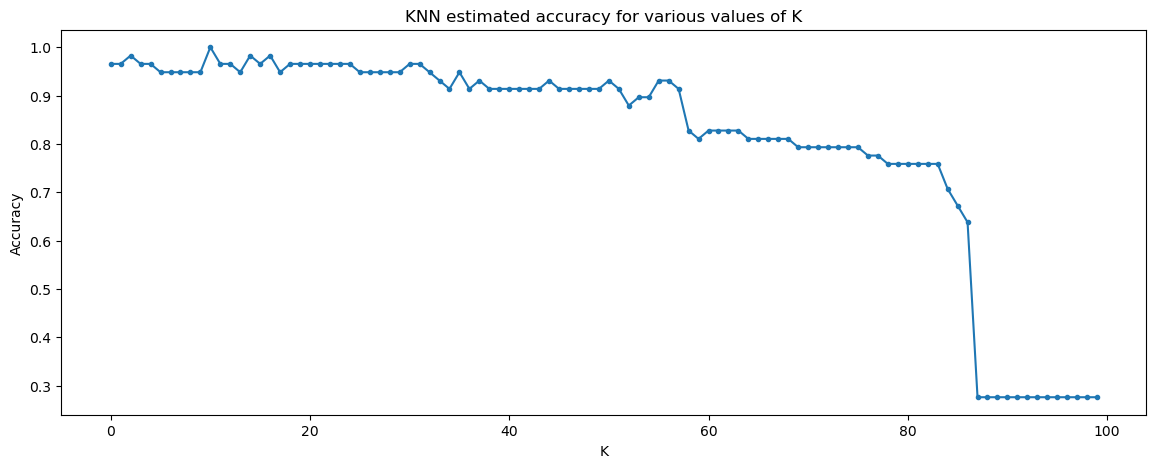

In [256]:
fname = 'iris.csv'
Kmax = 100
main(fname, Kmax)

# Second Part Of Q2:

In [257]:
def SplitTrainTestMatRot(X,Y):
    
    # Our function to rand the value of Ntrain from a uniform distribution arround 75-110
    
    # permute the ordering of the examples
    ind = np.random.RandomState(seed=int(id1)+int(id2)).permutation(len(Y))

    # randomly choose the size of the training data
    Ntrain = 80 + np.random.randint(31)

    # split the data into train and test datasets
    X_train = X[ind[:Ntrain]]
    Y_train = Y[ind[:Ntrain]]
    X_test  = X[ind[Ntrain:]]
    Y_test  = Y[ind[Ntrain:]]

    return X_train, Y_train, X_test, Y_test

In [258]:
def oneHundredMiles(Kmax):
    
    G = 100 # number of itterations
    
    # STEP 1: load data
    X,Y = LoadIrisData(fname)
    
    # an array to store all computed accuracies
    accuracyMat = np.zeros((G,Kmax))
    accuracyMean = np.zeros(Kmax)
    for i in range(G):
        
        # STEP 2: split the data into train/test datasets
        X_train, Y_train, X_test, Y_test = SplitTrainTestMatRot(X,Y)
        #print('Data is split into ' + str(X_train.shape[0]) + ' examples for training and ' + str(X_test.shape[0]) + ' examples for testing')

        # repeat for all considered values of K
        for K in range(Kmax):

            # STEP 3: classify the test data using a KNN classifier
            Y_pred = KNearestNeighborsClassifier(X_train, Y_train, X_test , K+1)

            # STEP 4: calculate the KNN classifier accuracy
            accuracyMat[i,K] = Accuracy(Y_pred, Y_test)   
    
    
    accuracyMean = np.mean(accuracyMat,axis = 0)
    PlotAccuracy(accuracyMean)
    return

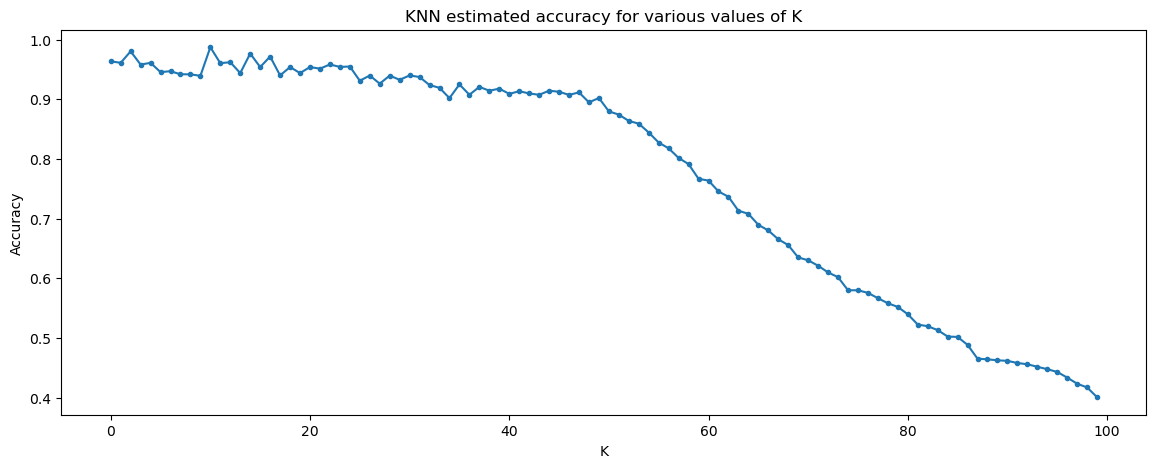

In [259]:
oneHundredMiles(100)